In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

In [4]:
df = pd.read_csv('oasis_longitudinal.csv')

In [5]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [6]:
df.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [7]:
df['SES'].fillna(df['SES'].mean(), inplace=True)

In [8]:
df.isna().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          2
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [9]:
df.dropna(axis=0,inplace=True)

In [10]:
df.isna().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [11]:
df.drop(['Hand', 'MRI ID', 'Subject ID', 'Visit'], axis=1, inplace=True)

In [12]:
df['M/F'] = df['M/F'].replace(['M','F'], [0,1])

In [13]:
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])

df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0])

In [14]:
df.describe()

,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,0.487871,593.876011,0.568733,77.018868,14.611860,2.460452,27.342318,0.287062,1489.876011,0.729526,1.193776
std,0.500528,636.636500,0.495922,7.660864,2.877737,1.107647,3.683244,0.371912,174.990473,0.037229,0.136533
min,0.000000,0.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,0.000000,0.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1358.500000,0.700000,1.098500
50%,0.000000,552.000000,1.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1471.000000,0.729000,1.193000
75%,1.000000,869.500000,1.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1598.000000,0.756000,1.292000
max,1.000000,2639.000000,1.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


Group       0.777360
MR Delay   -0.067299
M/F        -0.213504
Age        -0.025147
EDUC       -0.145614
SES         0.074115
MMSE       -0.686519
CDR         1.000000
eTIV        0.042450
nWBV       -0.350473
ASF        -0.053767
Name: CDR, dtype: float64


<Axes: >

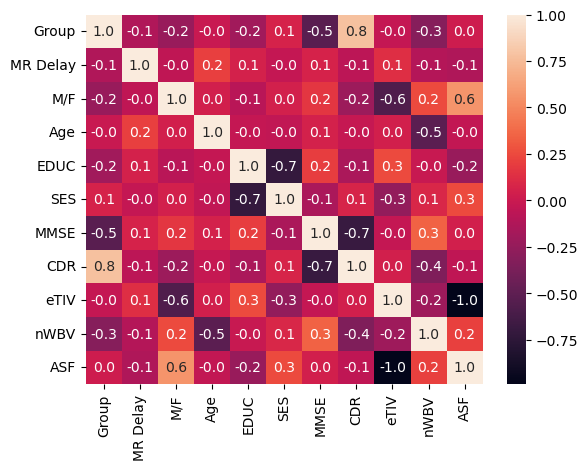

In [15]:
import seaborn as sb

matrica_korelacije= df.corr()
print(matrica_korelacije['CDR'])
sb.heatmap(matrica_korelacije, annot=True,fmt=".1f")

(array([ 1.,  0.,  0.,  0.,  2.,  1.,  3.,  1.,  2.,  5.,  1.,  5.,  0.,
         7.,  3.,  8.,  1.,  5.,  3.,  6.,  9.,  4.,  5.,  8., 19.,  5.,
        10.,  6.,  3., 10.,  5.,  2.,  9.,  8.,  4.,  2.,  4.,  3.,  4.,
         4.,  2.,  3.,  0.,  2.,  1.,  1.,  1.,  1.,  0.,  1.]),
 array([0.644  , 0.64786, 0.65172, 0.65558, 0.65944, 0.6633 , 0.66716,
        0.67102, 0.67488, 0.67874, 0.6826 , 0.68646, 0.69032, 0.69418,
        0.69804, 0.7019 , 0.70576, 0.70962, 0.71348, 0.71734, 0.7212 ,
        0.72506, 0.72892, 0.73278, 0.73664, 0.7405 , 0.74436, 0.74822,
        0.75208, 0.75594, 0.7598 , 0.76366, 0.76752, 0.77138, 0.77524,
        0.7791 , 0.78296, 0.78682, 0.79068, 0.79454, 0.7984 , 0.80226,
        0.80612, 0.80998, 0.81384, 0.8177 , 0.82156, 0.82542, 0.82928,
        0.83314, 0.837  ]),
 <BarContainer object of 50 artists>)

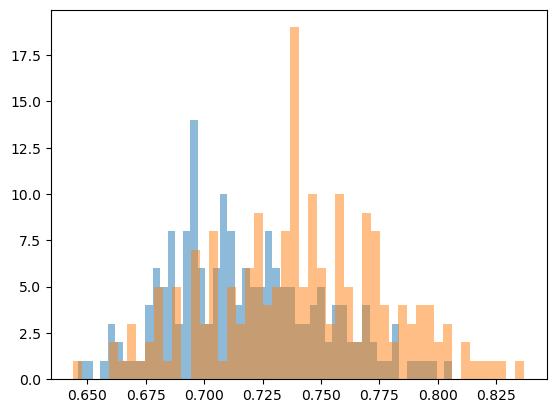

In [16]:
group_demented = df.loc[df['Group']==1,'nWBV']
group_nondemented = df.loc[df['Group']==0,'nWBV']
plt.hist(group_demented, bins=50, alpha=0.5, label='demented', density=False)
plt.hist(group_nondemented, bins=50, alpha=0.5, label='nondemented', density=False)
#sns.histplot(x='nWBV',data=df,hue='Group')

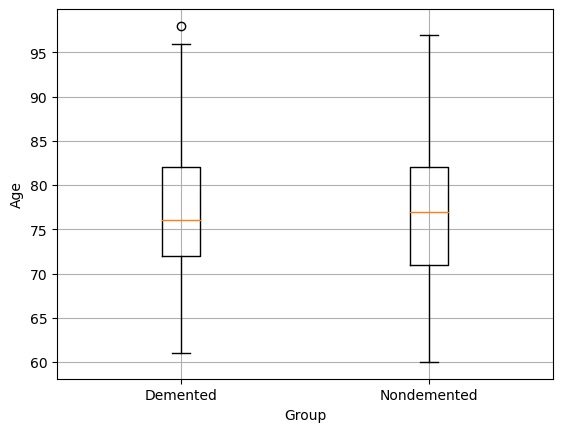

In [17]:
group_demented = df.loc[df['Group']==1,'Age']
group_nondemented = df.loc[df['Group']==0,'Age']
plt.figure()
plt.boxplot([group_demented, group_nondemented])
plt.ylabel('Age')
plt.xlabel('Group')
plt.xticks([1,2], ['Demented','Nondemented'])
plt.grid()

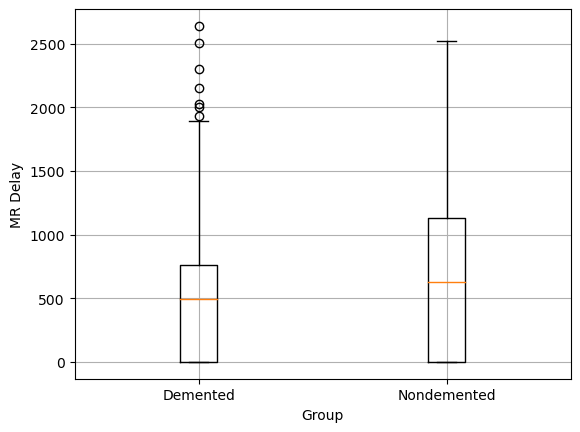

In [18]:
group_demented = df.loc[df['Group']==1,'MR Delay']
group_nondemented = df.loc[df['Group']==0,'MR Delay']
plt.figure()
plt.boxplot([group_demented, group_nondemented])
plt.ylabel('MR Delay')
plt.xlabel('Group')
plt.xticks([1,2], ['Demented','Nondemented'])
plt.grid()

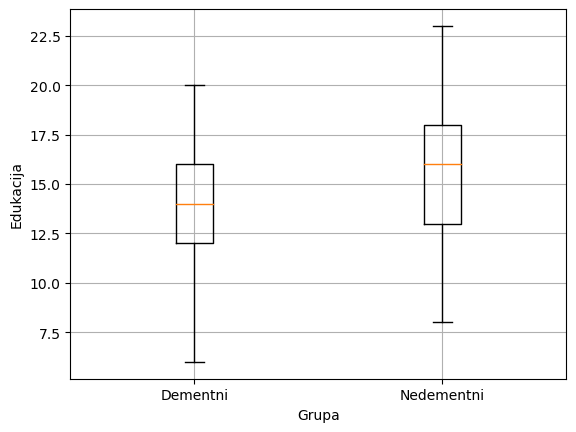

In [19]:
group_demented = df.loc[df['Group']==1,'EDUC']
group_nondemented = df.loc[df['Group']==0,'EDUC']
plt.figure()
plt.boxplot([group_demented, group_nondemented])
plt.ylabel('Edukacija')
plt.xlabel('Grupa')
plt.xticks([1,2], ['Dementni','Nedementni'])
plt.grid()

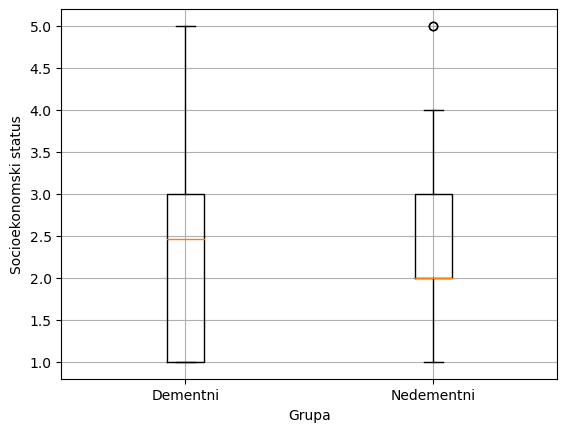

In [20]:
group_demented = df.loc[df['Group']==1,'SES']
group_nondemented = df.loc[df['Group']==0,'SES']
plt.figure()
plt.boxplot([group_demented, group_nondemented])
plt.ylabel('Socioekonomski status')
plt.xlabel('Grupa')
plt.xticks([1,2], ['Dementni','Nedementni'])
plt.grid()

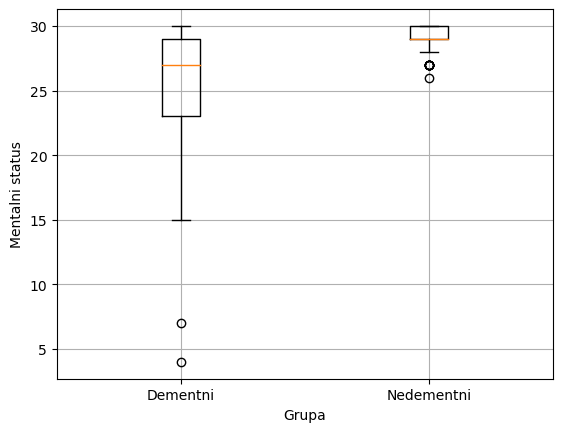

In [21]:
group_demented = df.loc[df['Group']==1,'MMSE']
group_nondemented = df.loc[df['Group']==0,'MMSE']
plt.figure()
plt.boxplot([group_demented, group_nondemented])
plt.ylabel('Mentalni status')
plt.xlabel('Grupa')
plt.xticks([1,2], ['Dementni','Nedementni'])
plt.grid()

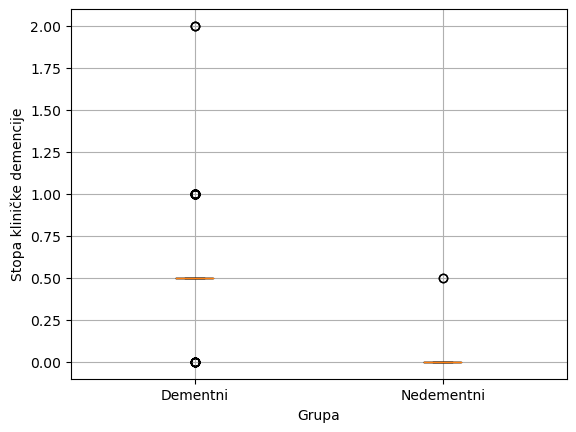

In [22]:
group_demented = df.loc[df['Group']==1,'CDR']
group_nondemented = df.loc[df['Group']==0,'CDR']
plt.figure()
plt.boxplot([group_demented, group_nondemented])
plt.ylabel('Stopa kliničke demencije')
plt.xlabel('Grupa')
plt.xticks([1,2], ['Dementni','Nedementni'])
plt.grid()

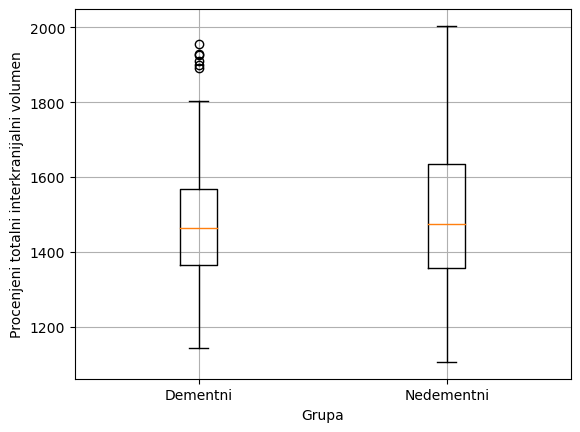

In [23]:
group_demented = df.loc[df['Group']==1,'eTIV']
group_nondemented = df.loc[df['Group']==0,'eTIV']
plt.figure()
plt.boxplot([group_demented, group_nondemented])
plt.ylabel('Procenjeni totalni interkranijalni volumen')
plt.xlabel('Grupa')
plt.xticks([1,2], ['Dementni','Nedementni'])
plt.grid()

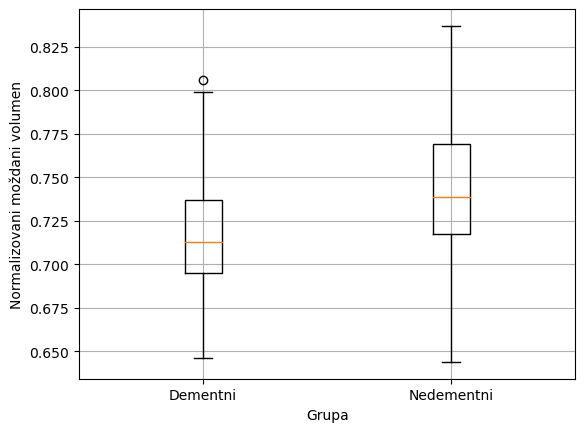

In [24]:
group_demented = df.loc[df['Group']==1,'nWBV']
group_nondemented = df.loc[df['Group']==0,'nWBV']
plt.figure()
plt.boxplot([group_demented, group_nondemented])
plt.ylabel('Normalizovani moždani volumen')
plt.xlabel('Grupa')
plt.xticks([1,2], ['Dementni','Nedementni'])
plt.grid()

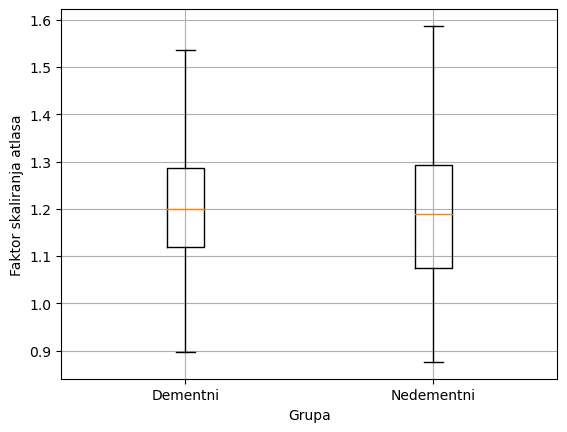

In [25]:
group_demented = df.loc[df['Group']==1,'ASF']
group_nondemented = df.loc[df['Group']==0,'ASF']
plt.figure()
plt.boxplot([group_demented, group_nondemented])
plt.ylabel('Faktor skaliranja atlasa')
plt.xlabel('Grupa')
plt.xticks([1,2], ['Dementni','Nedementni'])
plt.grid()

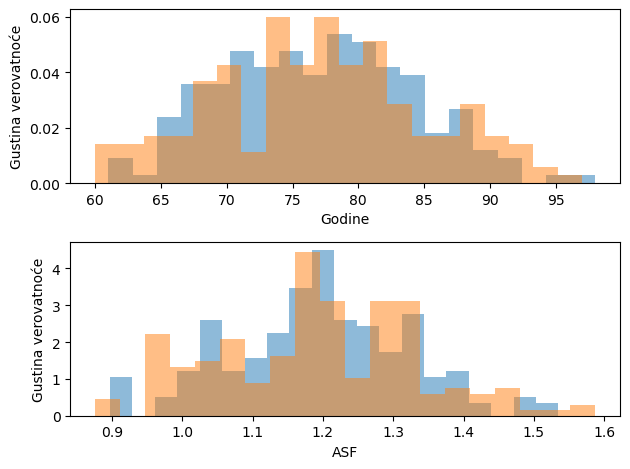

In [26]:
group_demented = df.loc[df['Group']==1,'Age']
group_nondemented = df.loc[df['Group']==0,'Age']
fig, axs = plt.subplots(2)

axs[0].hist(group_demented, density= True,alpha = 0.5,bins = 20,label= 'Demented')
axs[0].hist(group_nondemented, density = True,alpha=0.5, bins=20, label= 'Nondemented')

axs[0].set_xlabel('Godine')
axs[0].set_ylabel('Gustina verovatnoće')

group_demented1 = df.loc[df['Group']==1,'ASF']
group_nondemented1 = df.loc[df['Group']==0,'ASF']

axs[1].hist(group_demented1, density= True,alpha = 0.5,bins = 20,label= 'Demented')
axs[1].hist(group_nondemented1, density = True,alpha=0.5, bins=20, label= 'Nondemented')

axs[1].set_xlabel('ASF')
axs[1].set_ylabel('Gustina verovatnoće')

fig.tight_layout()
plt.show()

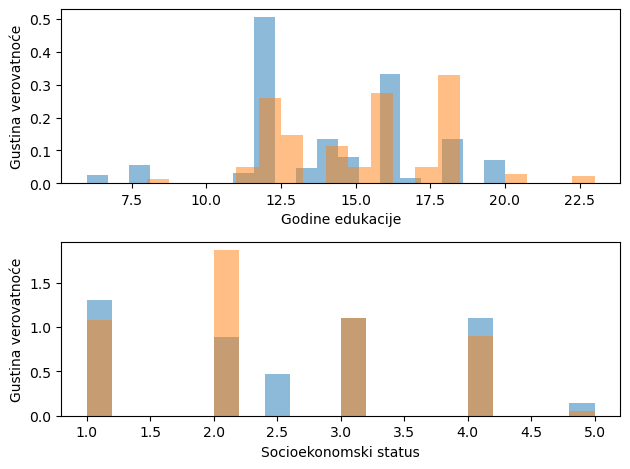

In [27]:
group_demented = df.loc[df['Group']==1,'EDUC']
group_nondemented = df.loc[df['Group']==0,'EDUC']
fig, axs = plt.subplots(2)

axs[0].hist(group_demented, density= True,alpha = 0.5,bins = 20,label= 'Demented')
axs[0].hist(group_nondemented, density = True,alpha=0.5, bins=20, label= 'Nondemented')

axs[0].set_xlabel('Godine edukacije')
axs[0].set_ylabel('Gustina verovatnoće')

group_demented1 = df.loc[df['Group']==1,'SES']
group_nondemented1 = df.loc[df['Group']==0,'SES']

axs[1].hist(group_demented1, density= True,alpha = 0.5,bins = 20,label= 'Demented')
axs[1].hist(group_nondemented1, density = True,alpha=0.5, bins=20, label= 'Nondemented')

axs[1].set_xlabel('Socioekonomski status')
axs[1].set_ylabel('Gustina verovatnoće')

fig.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


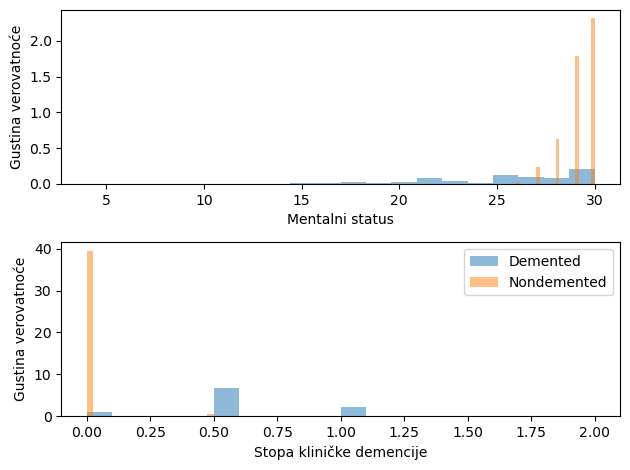

In [28]:
group_demented = df.loc[df['Group']==1,'MMSE']
group_nondemented = df.loc[df['Group']==0,'MMSE']
fig, axs = plt.subplots(2)

axs[0].hist(group_demented, density= True,alpha = 0.5,bins = 20,label= 'Demented')
axs[0].hist(group_nondemented, density = True,alpha=0.5, bins=20, label= 'Nondemented')
plt.legend()
axs[0].set_xlabel('Mentalni status')
axs[0].set_ylabel('Gustina verovatnoće')


group_demented1 = df.loc[df['Group']==1,'CDR']
group_nondemented1 = df.loc[df['Group']==0,'CDR']

axs[1].hist(group_demented1, density= True,alpha = 0.5,bins = 20,label= 'Demented')
axs[1].hist(group_nondemented1, density = True,alpha=0.5, bins=20, label= 'Nondemented')

axs[1].set_xlabel('Stopa kliničke demencije')
axs[1].set_ylabel('Gustina verovatnoće')

plt.legend()
fig.tight_layout()
plt.show()

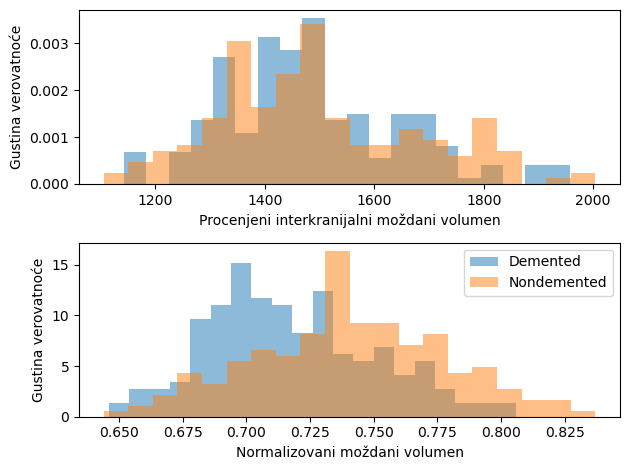

In [29]:
group_demented = df.loc[df['Group']==1,'eTIV']
group_nondemented = df.loc[df['Group']==0,'eTIV']
fig, axs = plt.subplots(2)

axs[0].hist(group_demented, density= True,alpha = 0.5,bins = 20,label= 'Demented')
axs[0].hist(group_nondemented, density = True,alpha=0.5, bins=20, label= 'Nondemented')

axs[0].set_xlabel('Procenjeni interkranijalni moždani volumen')
axs[0].set_ylabel('Gustina verovatnoće')

group_demented1 = df.loc[df['Group']==1,'nWBV']
group_nondemented1 = df.loc[df['Group']==0,'nWBV']

axs[1].hist(group_demented1, density= True,alpha = 0.5,bins = 20,label= 'Demented')
axs[1].hist(group_nondemented1, density = True,alpha=0.5, bins=20, label= 'Nondemented')

axs[1].set_xlabel('Normalizovani moždani volumen')
axs[1].set_ylabel('Gustina verovatnoće')

plt.legend()
# set the spacing between subplots
fig.tight_layout()
plt.show()

<Axes: xlabel='M/F', ylabel='Count'>

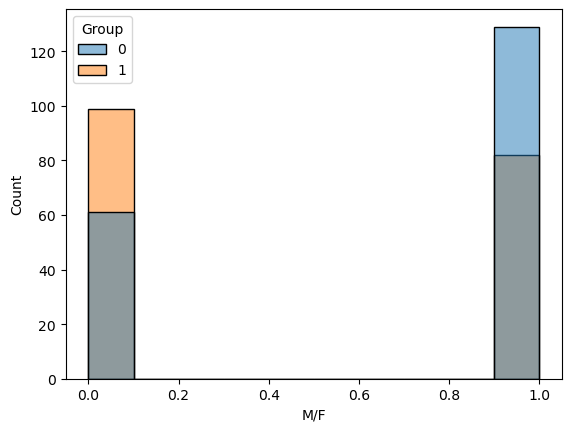

In [30]:
sns.histplot(x='M/F',data=df,hue='Group') 

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(0.0, 0.16)

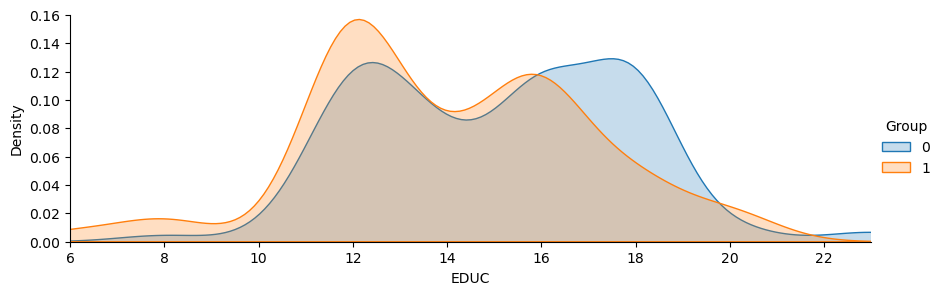

In [31]:
#1 predstavlja klasu dementnih a 0 klasu nedementnih
facet = sns.FacetGrid(df, hue="Group", aspect=3)  
facet.map(sns.kdeplot, 'EDUC', fill=True)  
facet.set(xlim=(df['EDUC'].min(), df['EDUC'].max()))  
facet.add_legend() 
plt.ylim(0, 0.16)

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


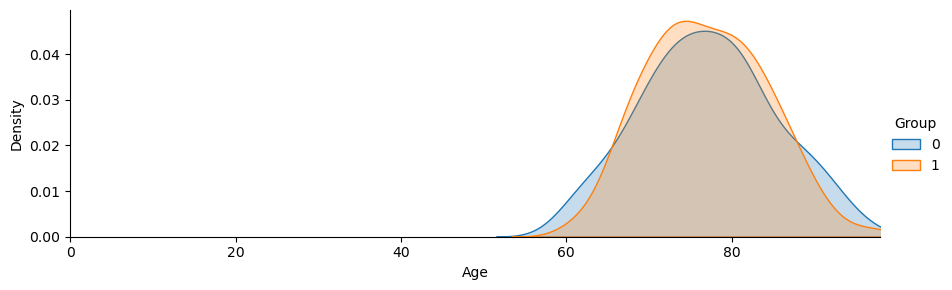

In [32]:
facet = sns.FacetGrid(df, hue="Group", aspect=3) 
facet.map(sns.kdeplot, 'Age',fill=True) 
facet.set(xlim=(0, df['Age'].max())) 
facet.add_legend() 
#plt.xlim(50, 100) 

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\TehnoCentar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\TehnoCentar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(0.6, 0.9)

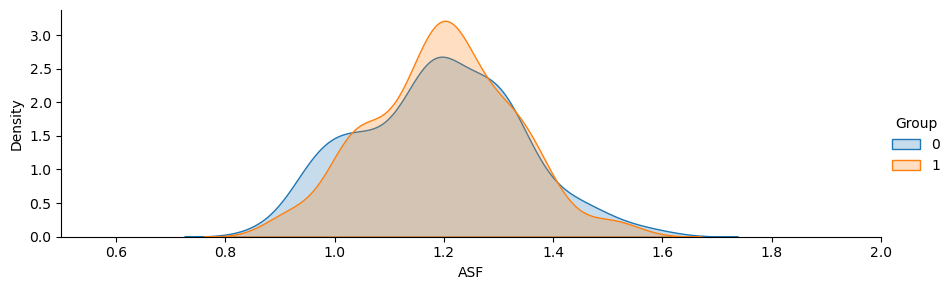

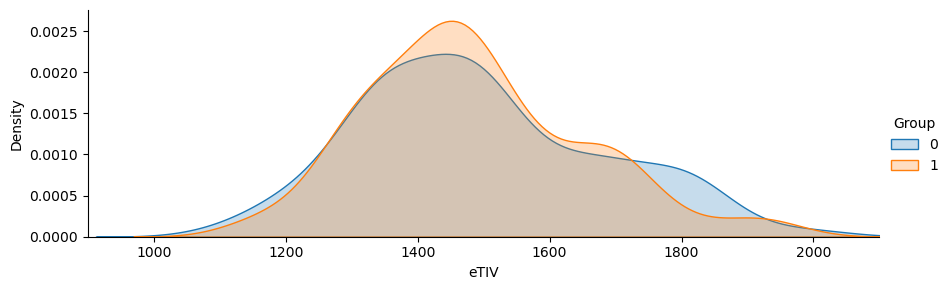

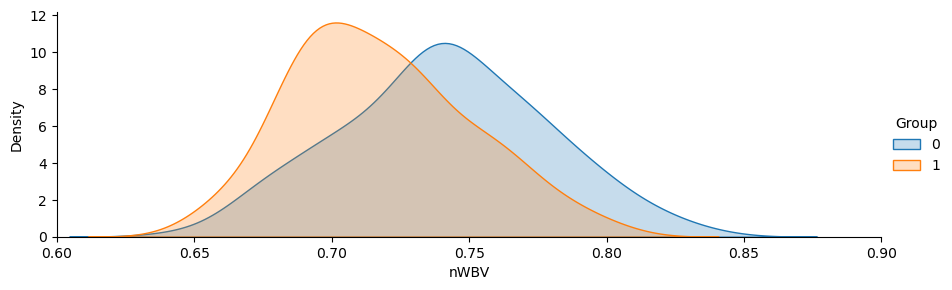

In [33]:
facet = sns.FacetGrid(df, hue="Group", aspect=3)  
facet.map(sns.kdeplot, 'ASF', fill=True)  
facet.set(xlim=(0, df['ASF'].max())) 
facet.add_legend() 
plt.xlim(0.5, 2)  

facet = sns.FacetGrid(df, hue="Group", aspect=3)  
facet.map(sns.kdeplot, 'eTIV', fill=True) 
facet.set(xlim=(0, df['eTIV'].max()))
facet.add_legend()  
plt.xlim(900, 2100)

facet = sns.FacetGrid(df, hue="Group", aspect=3)  
facet.map(sns.kdeplot, 'nWBV', fill=True)  
facet.set(xlim=(0, df['nWBV'].max()))  
facet.add_legend()  
plt.xlim(0.6, 0.9)

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(15.0, 30.0)

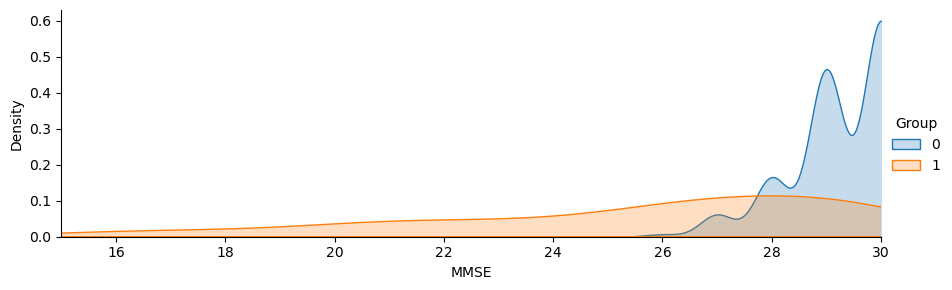

In [34]:
facet = sns.FacetGrid(df, hue="Group", aspect=3)
facet.map(sns.kdeplot, 'MMSE', fill=True)
facet.set(xlim=(0, df['MMSE'].max()))

facet.add_legend()
plt.xlim(15, 30)

In [36]:
X = df.iloc[:, 1:] 
y = df.iloc[:, 0] 

In [37]:
print("broj uzoraka u klasi dementnih je: ", sum(y==1))
print("broj uzoraka u klasi nedementnih je: ", sum(y==0))

broj uzoraka u klasi dementnih je:  181
broj uzoraka u klasi nedementnih je:  190


In [38]:
X.describe()

,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,593.876011,0.568733,77.018868,14.611860,2.460452,27.342318,0.287062,1489.876011,0.729526,1.193776
std,636.636500,0.495922,7.660864,2.877737,1.107647,3.683244,0.371912,174.990473,0.037229,0.136533
min,0.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,0.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1358.500000,0.700000,1.098500
50%,552.000000,1.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1471.000000,0.729000,1.193000
75%,869.500000,1.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1598.000000,0.756000,1.292000
max,2639.000000,1.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [39]:
# podela skupa na trening i test podatke
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.1, random_state=10, stratify=y)

# podela na trening i validacione podatke
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.1, random_state=10, stratify=y_train1)

In [40]:
s = StandardScaler()
s.fit(X_train)
X_train_std = s.transform(X_train)
X_val_std = s.transform(X_val)
X_train_std = pd.DataFrame(X_train_std)
X_val_std = pd.DataFrame(X_val_std)
X_train_std.columns = list(X.columns)
X_val_std.columns = list(X.columns)

In [41]:
from sklearn.model_selection import GridSearchCV

#----------------K NAJBLIZIH SUSEDA-----------------

parameters = {'n_neighbors':[1,2,3,4,5],
              'metric':('hamming', 'euclidean', 'manhattan')}
classifier = KNeighborsClassifier()
clf = GridSearchCV(classifier, parameters, scoring='recall', cv=5, verbose=3)
clf.fit(X_train_std, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END .....metric=hamming, n_neighbors=1;, score=0.828 total time=   0.0s
[CV 2/5] END .....metric=hamming, n_neighbors=1;, score=0.897 total time=   0.0s
[CV 3/5] END .....metric=hamming, n_neighbors=1;, score=0.966 total time=   0.0s
[CV 4/5] END .....metric=hamming, n_neighbors=1;, score=0.828 total time=   0.0s
[CV 5/5] END .....metric=hamming, n_neighbors=1;, score=0.862 total time=   0.0s
[CV 1/5] END .....metric=hamming, n_neighbors=2;, score=0.793 total time=   0.0s
[CV 2/5] END .....metric=hamming, n_neighbors=2;, score=0.862 total time=   0.0s
[CV 3/5] END .....metric=hamming, n_neighbors=2;, score=0.931 total time=   0.0s
[CV 4/5] END .....metric=hamming, n_neighbors=2;, score=0.828 total time=   0.0s
[CV 5/5] END .....metric=hamming, n_neighbors=2;, score=0.793 total time=   0.0s
[CV 1/5] END .....metric=hamming, n_neighbors=3;, score=0.862 total time=   0.0s
[CV 2/5] END .....metric=hamming, n_neighbors=3;

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ('hamming', 'euclidean', 'manhattan'),
                         'n_neighbors': [1, 2, 3, 4, 5]},
             scoring='recall', verbose=3)

In [42]:
print("Najveca senzitivnost: ", clf.best_score_)
print("Najbolji hiperparametri: ", clf.best_params_)

Najveca senzitivnost:  0.9241379310344829
Najbolji hiperparametri:  {'metric': 'euclidean', 'n_neighbors': 1}


In [64]:
classifier = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
classifier.fit(X_train_std,y_train)
y_pred = classifier.predict(X_val_std)

[[15  2]
 [ 3 14]]


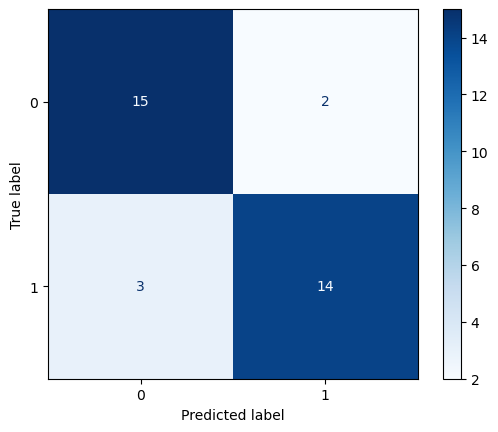

In [65]:
conf_mat = confusion_matrix(y_val, y_pred, labels=classifier.classes_)
print(conf_mat)  
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=classifier.classes_)
disp.plot(cmap="Blues")

In [66]:
from sklearn import metrics
precision = metrics.precision_score(y_val, y_pred)
accuracy = metrics.accuracy_score(y_val, y_pred)
sensitivity = metrics.recall_score(y_val, y_pred)
f_score = metrics.f1_score(y_val, y_pred)

print('precision: ', precision)
print('accuracy: ', accuracy)
print('sensitivity/recall: ', sensitivity)
print('F score: ', f_score)

precision:  0.875
accuracy:  0.8529411764705882
sensitivity/recall:  0.8235294117647058
F score:  0.8484848484848485


In [73]:
from sklearn.ensemble import RandomForestClassifier

parameters = { 'n_estimators': range(10, 100), 
              'max_features': ['sqrt'],
              'max_depth': [5,10,15,20,50],
              'criterion' :['gini', 'entropy']}
classifier1 = RandomForestClassifier()
clf_rsf = GridSearchCV(classifier1,parameters, scoring='recall', cv=5, verbose=3)
clf_rsf.fit(X_train_std, y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=10;, score=0.862 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=10;, score=0.897 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=10;, score=0.966 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=10;, score=0.966 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=10;, score=0.897 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=11;, score=0.862 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=11;, score=0.897 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=11;, score=0.966 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=s

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 50],
                         'max_features': ['sqrt'],
                         'n_estimators': range(10, 100)},
             scoring='recall', verbose=3)

In [74]:
print("Najbolja senzitivnost: ", clf_rsf.best_score_)
print("Najbolji hiperparametri: ", clf_rsf.best_params_)

Najbolja senzitivnost:  0.9310344827586208
Najbolji hiperparametri:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 22}


In [70]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
classifier_rsf=RandomForestClassifier(random_state=42, n_estimators= 22, max_depth=10, criterion='gini',max_features='sqrt', oob_score=True)
classifier_rsf.fit(X_train_std, y_train)
y_pred_rsf = classifier_rsf.predict(X_val_std)

[[17  0]
 [ 4 13]]


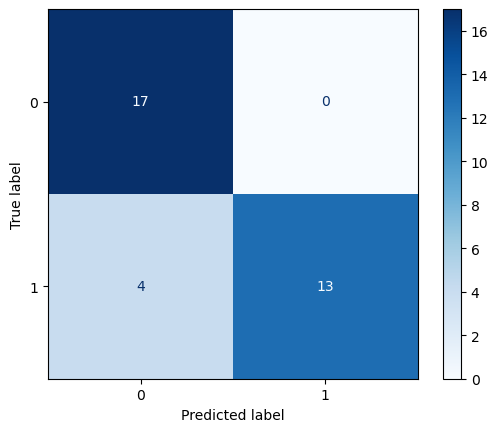

In [76]:
conf_mat = confusion_matrix(y_val, y_pred_rsf, labels=classifier_rsf.classes_) # TN, FP
print(conf_mat)  
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=classifier_rsf.classes_)
disp.plot(cmap="Blues")

In [77]:
precision1 = metrics.precision_score(y_val, y_pred_rsf)
accuracy1 = metrics.accuracy_score(y_val, y_pred_rsf)
sensitivity1 = metrics.recall_score(y_val, y_pred_rsf)
f_score1 = metrics.f1_score(y_val, y_pred_rsf)

print('precision: ', precision1)
print('accuracy: ', accuracy1)
print('sensitivity/recall: ', sensitivity1)
print('F score: ', f_score1)

precision:  1.0
accuracy:  0.8823529411764706
sensitivity/recall:  0.7647058823529411
F score:  0.8666666666666666


In [80]:
from sklearn.neural_network import MLPClassifier

parameters_nn = {'hidden_layer_sizes':[(10,30,10) ,(30,20,10), (10,20,30)],
                 'solver':['sgd','adam'],
                 'activation':['tanh', 'relu'], 
                 'max_iter':[600,700,800,900],
                'learning_rate': ['adaptive','constant']}
classifier_nn = MLPClassifier()
clf = GridSearchCV(classifier_nn, parameters_nn, scoring='recall', cv=5, verbose=3)
clf.fit(X_train_std, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=600, solver=sgd;, score=0.862 total time=   1.2s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=600, solver=sgd;, score=0.931 total time=   1.5s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=600, solver=sgd;, score=0.966 total time=   1.4s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=600, solver=sgd;, score=0.966 total time=   1.3s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=600, solver=sgd;, score=0.897 total time=   1.4s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=600, solver=adam;, score=0.897 total time=   1.4s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=600, solver=adam;, score=0.931 total time=   1.6s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=600, solver=adam;, score=0.931 total time=   1.6s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=600, solver=adam;, score=1.000 total time=   1.5s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=600, solver=adam;, score=0.931 total time=   1.6s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=700, solver=sgd;, score=0.862 total time=   1.2s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=700, solver=sgd;, score=0.897 total time=   1.1s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=700, solver=sgd;, score=0.931 total time=   1.3s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=700, solver=sgd;, score=0.966 total time=   1.5s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=700, solver=sgd;, score=0.897 to

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=700, solver=adam;, score=0.931 total time=   1.8s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=700, solver=adam;, score=0.966 total time=   1.1s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=700, solver=adam;, score=0.897 total time=   0.6s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.862 total time=   1.6s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.897 total time=   1.4s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.931 total time=   1.6s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.966 t

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=800, solver=adam;, score=1.000 total time=   2.2s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=800, solver=adam;, score=0.931 total time=   2.0s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=900, solver=sgd;, score=0.862 total time=   1.6s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=900, solver=sgd;, score=0.897 total time=   1.3s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=900, solver=sgd;, score=0.966 total time=   1.9s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=900, solver=sgd;, score=0.966 total time=   1.3s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=900, solver=sgd;, score=0.897 to

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=600, solver=sgd;, score=0.862 total time=   1.4s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=600, solver=sgd;, score=0.897 total time=   1.4s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=600, solver=sgd;, score=0.966 total time=   1.5s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=600, solver=sgd;, score=0.966 total time=   1.4s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=600, solver=sgd;, score=0.897 total time=   1.0s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=600, solver=adam;, score=0.897 total time=   1.0s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=600, solver=adam;, score=0.897 total time=   1.5s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=600, solver=adam;, score=0.931 total time=   1.4s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=600, solver=adam;, score=1.000 total time=   1.6s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=600, solver=adam;, score=0.931 total time=   1.8s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=700, solver=sgd;, score=0.862 total time=   1.5s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=700, solver=sgd;, score=0.897 total time=   1.6s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=700, solver=sgd;, score=0.931 total time=   1.8s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=700, solver=sgd;, score=0.966 total time=   1.8s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=700, solver=sgd;, score=0.897 total time=   1.2s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=700, solver=adam;, score=0.897 to

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=800, solver=adam;, score=0.931 total time=   1.9s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=800, solver=adam;, score=0.966 total time=   1.0s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=800, solver=adam;, score=0.931 total time=   1.9s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=900, solver=sgd;, score=0.862 total time=   1.2s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=900, solver=sgd;, score=0.897 total time=   1.4s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=900, solver=sgd;, score=0.931 total time=   1.0s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=900, solver=sgd;, score=0.966 t

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=900, solver=adam;, score=0.931 total time=   2.5s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=900, solver=adam;, score=1.000 total time=   1.7s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=900, solver=adam;, score=0.897 total time=   2.4s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=600, solver=sgd;, score=0.862 total time=   1.7s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=600, solver=sgd;, score=0.897 total time=   1.9s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=600, solver=sgd;, score=0.931 total time=   1.7s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=600, solver=sgd;, score=0.966 total time=   1.2s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=600, solver=sgd;, score=0.897 total time=   1.3s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=600, solver=adam;, score=0.897 total time=   2.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=600, solver=adam;, score=0.897 total time=   1.6s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=600, solver=adam;, score=0.966 total time=   2.0s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=600, solver=adam;, score=1.000 total time=   2.1s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=600, solver=adam;, score=0.931 total time=   1.3s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=700, solver=sgd;, score=0.862 total time=   1.7s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=700, solver=sgd;, score=0.897 total time=   1.7s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=700, solver=sgd;, score=0.966 total time=   1.6s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=700, solver=sgd;, score=0.966 total time=   1.7s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=700, solver=sgd;, score=0.897 total time=   1.5s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=700, solver=adam;, score=0.897 to

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=700, solver=adam;, score=0.931 total time=   2.4s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=700, solver=adam;, score=1.000 total time=   2.4s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=700, solver=adam;, score=0.931 total time=   1.8s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.862 total time=   1.6s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.897 total time=   1.7s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.931 total time=   1.8s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.966 t

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=800, solver=adam;, score=1.000 total time=   2.8s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=800, solver=adam;, score=0.897 total time=   2.1s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=900, solver=sgd;, score=0.862 total time=   1.9s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=900, solver=sgd;, score=0.897 total time=   1.5s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=900, solver=sgd;, score=0.931 total time=   1.4s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=900, solver=sgd;, score=0.966 total time=   1.5s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=900, solver=sgd;, score=0.897 to

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=600, solver=adam;, score=0.931 total time=   1.9s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=600, solver=adam;, score=0.931 total time=   1.9s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=700, solver=sgd;, score=0.862 total time=   1.3s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=700, solver=sgd;, score=0.897 total time=   1.3s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=700, solver=sgd;, score=0.931 total time=   1.5s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=700, solver=sgd;, score=0.966 total time=   1.3s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=700, solver=sgd;, score=0.897 total time=   1.2s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=700, solver=adam;, score=0.897 total time=   2.4s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=700, solver=adam;, score=0.897 total time=   1.4s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=700, solver=adam;, score=0.966 total time=   2.4s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=700, solver=adam;, score=1.000 total time=   2.0s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=700, solver=adam;, score=0.931 total time=   2.4s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=800, solver=sgd;, score=0.862 total time=   1.5s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=800, solver=sgd;, score=0.897 total time=   1.3s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=800, solver=sgd;, score=0.931 total time=   1.7s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=800, solver=sgd;, score=0.966 t

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=800, solver=adam;, score=0.931 total time=   2.7s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=800, solver=adam;, score=1.000 total time=   1.5s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=800, solver=adam;, score=0.931 total time=   1.7s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=900, solver=sgd;, score=0.862 total time=   1.3s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=900, solver=sgd;, score=0.897 total time=   1.5s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=900, solver=sgd;, score=0.931 total time=   1.9s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=900, solver=sgd;, score=0.966 t

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=600, solver=sgd;, score=0.862 total time=   1.8s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=600, solver=sgd;, score=0.897 total time=   1.8s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=600, solver=sgd;, score=0.966 total time=   1.7s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=600, solver=sgd;, score=0.966 total time=   1.5s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=600, solver=sgd;, score=0.897 total time=   1.6s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=600, solver=adam;, score=0.862 total time=   1.6s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=600, solver=adam;, score=0.897 total time=   1.5s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=600, solver=adam;, score=0.931 t

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=600, solver=adam;, score=0.966 total time=   2.1s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=600, solver=adam;, score=0.931 total time=   2.1s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=700, solver=sgd;, score=0.862 total time=   1.9s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=700, solver=sgd;, score=0.897 total time=   2.0s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=700, solver=sgd;, score=0.931 total time=   1.3s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=700, solver=sgd;, score=0.966 total time=   2.0s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=700, solver=sgd;, score=0.897 total time=   1.6s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=700, solver=adam;, score=0.897 to

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=800, solver=adam;, score=0.931 total time=   2.9s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=800, solver=adam;, score=1.000 total time=   2.6s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=800, solver=adam;, score=0.897 total time=   2.2s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=900, solver=sgd;, score=0.862 total time=   1.8s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=900, solver=sgd;, score=0.897 total time=   1.9s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=900, solver=sgd;, score=0.931 total time=   1.8s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=900, solver=sgd;, score=0.966 t

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=600, solver=sgd;, score=0.966 total time=   1.9s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=600, solver=sgd;, score=0.897 total time=   1.4s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=600, solver=adam;, score=0.862 total time=   0.6s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=600, solver=adam;, score=0.931 total time=   1.5s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=600, solver=adam;, score=0.931 total time=   2.1s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=600, solver=adam;, score=0.966 total time=   1.6s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=600, solver=adam;, score=0.931 total time=   1.5s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=700, solver=sgd;, score=0.862 total time=   1.9s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=700, solver=sgd;, score=0.897 total time=   1.5s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=700, solver=sgd;, score=0.966 total time=   1.7s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=700, solver=sgd;, score=0.966 t

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=700, solver=adam;, score=0.931 total time=   2.4s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=700, solver=adam;, score=0.966 total time=   1.6s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=700, solver=adam;, score=0.897 total time=   1.6s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=800, solver=sgd;, score=0.862 total time=   1.5s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=800, solver=sgd;, score=0.897 total time=   1.5s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=800, solver=sgd;, score=0.966 total time=   1.3s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=800, solver=sgd;, score=0.966 t

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=800, solver=adam;, score=0.931 total time=   2.8s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=900, solver=sgd;, score=0.862 total time=   1.2s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=900, solver=sgd;, score=0.897 total time=   1.4s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=900, solver=sgd;, score=0.931 total time=   1.2s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=900, solver=sgd;, score=0.966 total time=   1.5s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=900, solver=sgd;, score=0.897 total time=   1.6s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=900, solver=adam;, score=0.897 to

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=600, solver=sgd;, score=0.897 total time=   1.2s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=600, solver=sgd;, score=0.931 total time=   1.4s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=600, solver=sgd;, score=0.966 total time=   1.5s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=600, solver=sgd;, score=0.897 total time=   1.6s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=600, solver=adam;, score=0.862 total time=   1.6s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=600, solver=adam;, score=0.862 total time=   2.2s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=600, solver=adam;, score=0.966 total time=   1.8s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=600, solver=adam;, score=0.966 total time=   1.9s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=600, solver=adam;, score=0.931 total time=   1.8s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=700, solver=sgd;, score=0.862 total time=   1.8s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=700, solver=sgd;, score=0.931 total time=   1.7s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=700, solver=sgd;, score=0.931 total time=   1.8s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=700, solver=sgd;, score=0.966 total time=   1.8s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=700, solver=sgd;, score=0.897 total time=   1.7s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=700, solver=adam;, score=0.897 total time=   2.7s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=700, solver=adam;, score=0.897 total time=   2.1s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=700, solver=adam;, score=1.000 total time=   1.9s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=700, solver=adam;, score=0.966 total time=   0.8s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=700, solver=adam;, score=0.862 total time=   1.8s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.862 total time=   2.1s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.931 total time=   2.1s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.931 total time=   1.8s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.966 total time=   1.7s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.897 total time=   1.7s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=800, solver=adam;, score=0.862 total time=   1.8s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=800, solver=adam;, score=0.897 total time=   1.1s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=800, solver=adam;, score=0.931 t

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=900, solver=sgd;, score=0.931 total time=   2.5s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=900, solver=sgd;, score=0.862 total time=   2.2s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=900, solver=adam;, score=0.862 total time=   1.3s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=900, solver=adam;, score=0.931 total time=   1.4s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=900, solver=adam;, score=0.966 total time=   2.5s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=900, solver=adam;, score=0.966 total time=   2.3s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, max_iter=900, solver=adam;, score=0.931

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=600, solver=sgd;, score=0.862 total time=   1.5s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=600, solver=sgd;, score=0.897 total time=   1.5s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=600, solver=sgd;, score=0.931 total time=   1.5s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=600, solver=sgd;, score=0.966 total time=   1.4s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=600, solver=sgd;, score=0.862 total time=   1.3s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=600, solver=adam;, score=0.897 total time=   1.6s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=600, solver=adam;, score=0.897 total time=   1.7s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=600, solver=adam;, score=0.966 total time=   1.8s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=600, solver=adam;, score=0.966 total time=   1.7s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=600, solver=adam;, score=0.793 total time=   1.7s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=700, solver=sgd;, score=0.828 total time=   1.5s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=700, solver=sgd;, score=0.897 total time=   1.8s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=700, solver=sgd;, score=0.966 total time=   1.7s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=700, solver=sgd;, score=0.897 total time=   1.4s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=700, solver=sgd;, score=0.897 total time=   1.8s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=700, solver=adam;, score=0.862 total time=   1.6s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=700, solver=adam;, score=0.897 total time=   2.2s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=700, solver=adam;, score=0.931 total time=   2.0s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=700, solver=adam;, score=0.966 total time=   1.9s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=700, solver=adam;, score=0.897 total time=   1.7s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=800, solver=sgd;, score=0.862 total time=   2.1s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=800, solver=sgd;, score=0.897 total time=   1.4s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=800, solver=sgd;, score=0.966 total time=   1.0s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=800, solver=sgd;, score=0.966 total time=   1.6s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=800, solver=sgd;, score=0.897 total time=   2.2s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=800, solver=adam;, score=0.897 total time=   1.5s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=800, solver=adam;, score=0.931 total time=   1.7s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=800, solver=adam;, score=0.931 total time=   2.0s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=800, solver=adam;, score=0.931 total time=   2.4s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=800, solver=adam;, score=0.897 total time=   2.1s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=900, solver=sgd;, score=0.862

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=900, solver=sgd;, score=0.966 total time=   3.2s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=900, solver=sgd;, score=0.862 total time=   2.0s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=900, solver=adam;, score=0.897 total time=   1.9s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=900, solver=adam;, score=0.897 total time=   1.9s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=900, solver=adam;, score=0.897 total time=   1.4s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=900, solver=adam;, score=1.000 total time=   2.2s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, max_iter=900, solver=adam;, score=0.897

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=600, solver=sgd;, score=0.862 total time=   2.2s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=600, solver=sgd;, score=0.897 total time=   2.2s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=600, solver=sgd;, score=0.931 total time=   2.2s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=600, solver=sgd;, score=0.966 total time=   2.2s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=600, solver=sgd;, score=0.897 total time=   2.1s
[CV 1/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=600, solver=adam;, score=0.862 total time=   1.6s
[CV 2/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=600, solver=adam;, score=0.897 total time=   1.6s
[CV 3/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=600, solver=adam;, score=0.931 total time=   1.5s
[CV 4/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=600, solver=adam;, score=0.966 total time=   1.9s
[CV 5/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=600, solver=adam;, score=0.931 total time=   2.1s
[CV 1/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=700, solver=sgd;, score=0.862

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=700, solver=sgd;, score=0.966 total time=   2.4s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=700, solver=sgd;, score=0.966 total time=   2.5s
[CV 5/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=700, solver=sgd;, score=0.897 total time=   2.3s
[CV 1/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=700, solver=adam;, score=0.897 total time=   1.6s
[CV 2/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=700, solver=adam;, score=0.897 total time=   1.9s
[CV 3/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=700, solver=adam;, score=0.966 total time=   1.9s
[CV 4/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=700, solver=adam;, score=0.966 total time=   1.7s
[CV 5/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=700, solver=adam;, score=0.931

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.897 total time=   3.0s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.966 total time=   2.9s
[CV 4/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.966 total time=   2.8s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.897 total time=   3.1s
[CV 1/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=800, solver=adam;, score=0.897 total time=   1.6s
[CV 2/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=800, solver=adam;, score=0.897 total time=   2.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=800, solver=adam;, score=0.966 total time=   2.5s
[CV 4/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=800, solver=adam;, score=0.966 total time=   1.8s
[CV 5/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=800, solver=adam;, score=0.862 total time=   2.4s
[CV 1/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=adaptive, max_iter=900, solver=sgd;, score=0.862

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=600, solver=sgd;, score=0.862 total time=   2.4s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=600, solver=sgd;, score=0.897 total time=   2.3s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=600, solver=sgd;, score=0.931 total time=   2.3s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=600, solver=sgd;, score=0.966 total time=   2.2s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=600, solver=sgd;, score=0.897 total time=   2.3s
[CV 1/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=600, solver=adam;, score=0.862 total time=   1.5s
[CV 2/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=600, solver=adam;, score=0.897 total time=   1.6s
[CV 3/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=600, solver=adam;, score=0.966 total time=   2.1s
[CV 4/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=600, solver=adam;, score=0.897 total time=   2.2s
[CV 5/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=600, solver=adam;, score=0.897 total time=   2.2s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=700, solver=sgd;, score=0.862 total time=   2.7s
[CV 2/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=700, solver=sgd;, score=0.931 total time=   2.3s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=700, solver=sgd;, score=0.966 total time=   2.7s
[CV 4/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=700, solver=sgd;, score=0.966 total time=   2.0s
[CV 5/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=700, solver=sgd;, score=0.897 total time=   2.3s
[CV 1/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=700, solver=adam;, score=0.828 total time=   1.8s
[CV 2/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=700, solver=adam;, score=0.862 total time=   2.1s
[CV 3/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=700, solver=adam;, score=0.931 total time=   2.1s
[CV 4/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=700, solver=adam;, score=0.966 

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=900, solver=sgd;, score=0.966 total time=   3.1s
[CV 4/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=900, solver=sgd;, score=0.966 total time=   2.5s
[CV 5/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=900, solver=sgd;, score=0.897 total time=   1.8s
[CV 1/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=900, solver=adam;, score=0.862 total time=   1.4s
[CV 2/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=900, solver=adam;, score=0.897 total time=   1.6s
[CV 3/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=900, solver=adam;, score=0.966 total time=   1.8s
[CV 4/5] END activation=relu, hidden_layer_sizes=(30, 20, 10), learning_rate=constant, max_iter=900, solver=adam;, score=0.966 

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=600, solver=sgd;, score=0.862 total time=   2.0s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=600, solver=sgd;, score=0.897 total time=   1.9s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=600, solver=sgd;, score=0.966 total time=   1.6s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=600, solver=sgd;, score=0.966 total time=   1.9s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=600, solver=sgd;, score=0.897 total time=   2.0s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=600, solver=adam;, score=0.897 total time=   1.6s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=600, solver=adam;, score=0.897 total time=   2.2s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=600, solver=adam;, score=0.931 total time=   1.9s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=600, solver=adam;, score=0.966 total time=   1.6s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=600, solver=adam;, score=0.897 total time=   2.1s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=700, solver=sgd;, score=0.862 total time=   1.8s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=700, solver=sgd;, score=0.897 total time=   2.3s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=700, solver=sgd;, score=0.966 total time=   2.3s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=700, solver=sgd;, score=0.966 total time=   2.3s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=700, solver=sgd;, score=0.897 total time=   2.3s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=700, solver=adam;, score=0.897 total time=   2.1s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=700, solver=adam;, score=0.897 total time=   2.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=700, solver=adam;, score=0.931 total time=   1.3s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=700, solver=adam;, score=1.000 total time=   1.6s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=700, solver=adam;, score=0.897 total time=   1.9s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.862 total time=   2.7s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.931 total time=   2.7s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.931 total time=   2.7s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.966 total time=   2.6s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=800, solver=sgd;, score=0.897 total time=   1.9s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=800, solver=adam;, score=0.897 total time=   1.6s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=800, solver=adam;, score=0.897 total time=   1.8s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=800, solver=adam;, score=1.000 total time=   2.2s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=800, solver=adam;, score=0.931 total time=   3.0s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=800, solver=adam;, score=0.931 total time=   2.5s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=900, solver=sgd;, score=0.862 total time=   2.5s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=900, solver=sgd;, score=0.897 total time=   2.8s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=900, solver=sgd;, score=0.931 total time=   3.0s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=900, solver=sgd;, score=0.966 total time=   2.3s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=adaptive, max_iter=900, solver=sgd;, score=0.897 to

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=600, solver=sgd;, score=0.862 total time=   2.0s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=600, solver=sgd;, score=0.897 total time=   1.8s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=600, solver=sgd;, score=0.966 total time=   2.0s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=600, solver=sgd;, score=0.966 total time=   2.0s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=600, solver=sgd;, score=0.897 total time=   1.8s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=600, solver=adam;, score=0.897 total time=   1.6s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=600, solver=adam;, score=0.897 total time=   1.8s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=600, solver=adam;, score=0.931 total time=   1.8s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=600, solver=adam;, score=0.931 total time=   2.2s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=600, solver=adam;, score=0.931 total time=   2.2s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=700, solver=sgd;, score=0.862

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=700, solver=sgd;, score=0.931 total time=   2.3s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=700, solver=sgd;, score=0.966 total time=   2.0s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=700, solver=sgd;, score=0.966 total time=   2.1s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=700, solver=sgd;, score=0.897 total time=   2.2s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=700, solver=adam;, score=0.828 total time=   1.3s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=700, solver=adam;, score=0.897 total time=   1.8s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=700, solver=adam;, score=0.931 total time=   1.8s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), learning_rate=constant, max_iter=700, solver=adam;, score=0.966 

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [(10, 30, 10), (30, 20, 10),
                                                (10, 20, 30)],
                         'learning_rate': ['adaptive', 'constant'],
                         'max_iter': [600, 700, 800, 900],
                         'solver': ['sgd', 'adam']},
             scoring='recall', verbose=3)

In [81]:
print("Najbolja senzitivnost: ", clf.best_score_)
print("Najbolji hiperparametri: ", clf.best_params_)

Najbolja senzitivnost:  0.9448275862068967
Najbolji hiperparametri:  {'activation': 'relu', 'hidden_layer_sizes': (30, 20, 10), 'learning_rate': 'constant', 'max_iter': 800, 'solver': 'adam'}


In [82]:
classifier_nn = MLPClassifier(hidden_layer_sizes =(30,20,10),max_iter = 800, activation = 'relu', solver='adam')
classifier_nn.fit(X_train_std,y_train)
y_pred_nn = classifier_nn.predict(X_val_std)

[[16  1]
 [ 3 14]]


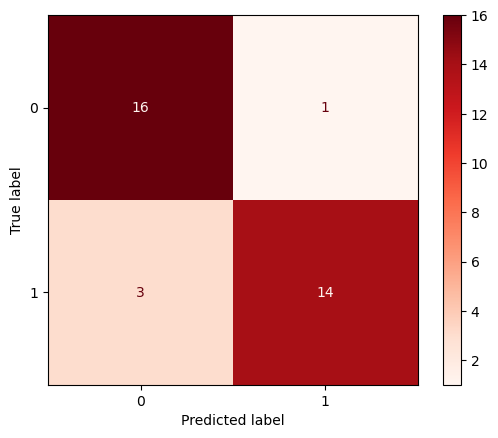

In [83]:
conf_mat = confusion_matrix(y_val, y_pred_nn, labels=classifier_nn.classes_) 
print(conf_mat)  
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=classifier_nn.classes_)
disp.plot(cmap="Reds")

In [84]:
precision = metrics.precision_score(y_val, y_pred_nn)
accuracy = metrics.accuracy_score(y_val, y_pred_nn)
sensitivity = metrics.recall_score(y_val, y_pred_nn)
f_score = metrics.f1_score(y_val, y_pred_nn)

print('precision: ', precision)
print('accuracy: ', accuracy)
print('sensitivity/recall: ', sensitivity)
print('F score: ', f_score)

precision:  0.9333333333333333
accuracy:  0.8823529411764706
sensitivity/recall:  0.8235294117647058
F score:  0.8749999999999999


In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA(n_components=0.90)
pca.fit(X_train_std)
X_train_r = pca.fit_transform(X_train_std)
X_test_r = pca.transform(X_val_std)

In [88]:
parameters = {'n_neighbors':[1,2,3,4,5],
              'metric':('hamming', 'euclidean', 'manhattan')}
classifier_knnp = KNeighborsClassifier()
clf = GridSearchCV(classifier, parameters, scoring='recall', cv=5, verbose=3)
clf.fit(X_train_r, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END .....metric=hamming, n_neighbors=1;, score=0.000 total time=   0.0s
[CV 2/5] END .....metric=hamming, n_neighbors=1;, score=0.000 total time=   0.0s
[CV 3/5] END .....metric=hamming, n_neighbors=1;, score=0.000 total time=   0.0s
[CV 4/5] END .....metric=hamming, n_neighbors=1;, score=0.000 total time=   0.0s
[CV 5/5] END .....metric=hamming, n_neighbors=1;, score=0.000 total time=   0.0s
[CV 1/5] END .....metric=hamming, n_neighbors=2;, score=0.000 total time=   0.0s
[CV 2/5] END .....metric=hamming, n_neighbors=2;, score=0.000 total time=   0.0s
[CV 3/5] END .....metric=hamming, n_neighbors=2;, score=0.000 total time=   0.0s
[CV 4/5] END .....metric=hamming, n_neighbors=2;, score=0.000 total time=   0.0s
[CV 5/5] END .....metric=hamming, n_neighbors=2;, score=0.000 total time=   0.0s
[CV 1/5] END .....metric=hamming, n_neighbors=3;, score=0.000 total time=   0.0s
[CV 2/5] END .....metric=hamming, n_neighbors=3;

GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(metric='euclidean', n_neighbors=1),
             param_grid={'metric': ('hamming', 'euclidean', 'manhattan'),
                         'n_neighbors': [1, 2, 3, 4, 5]},
             scoring='recall', verbose=3)

In [93]:
print("Najveca osetljivost: ", clf.best_score_)
print("Najbolji hiperparametri: ", clf.best_params_)

Najveca osetljivost:  0.9103448275862069
Najbolji hiperparametri:  {'metric': 'euclidean', 'n_neighbors': 1}


In [90]:
knn_pca1 = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn_pca1.fit(X_train_r,y_train)
y_pred_pca = knn_pca1.predict(X_test_r)

[[15  2]
 [ 2 15]]


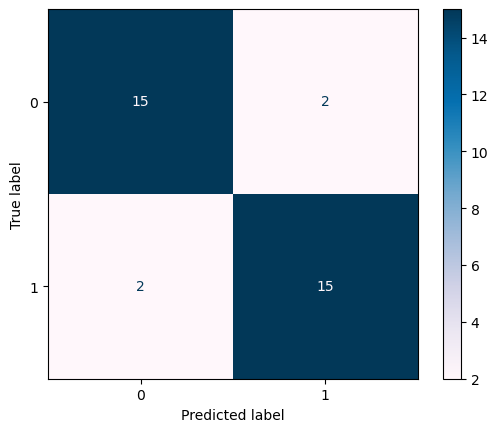

In [92]:
conf_mat = confusion_matrix(y_val, y_pred_pca, labels=knn_pca1.classes_) # TN, FP
print(conf_mat)  
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=knn_pca1.classes_)
disp.plot(cmap="PuBu")

In [94]:
precision_pca = metrics.precision_score(y_val, y_pred_pca)
accuracy_pca= metrics.accuracy_score(y_val, y_pred_pca)
sensitivity_pca = metrics.recall_score(y_val, y_pred_pca)
f_score_pca = metrics.f1_score(y_val, y_pred_pca)

print('precision: ', precision_pca)
print('accuracy: ', accuracy_pca)
print('sensitivity/recall: ', sensitivity_pca)
print('F score: ', f_score_pca)

precision:  0.8823529411764706
accuracy:  0.8823529411764706
sensitivity/recall:  0.8823529411764706
F score:  0.8823529411764706


In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
parameters = { 'n_estimators': range(10,100),
              'max_features': ['sqrt'], 
              'max_depth' : [5,10,15,20,50],
              'criterion' :['gini', 'entropy']}
classifier_rsf = RandomForestClassifier()
clf_pca_rsf = GridSearchCV(classifier_rsf, parameters, scoring='recall', cv=5, verbose=3)
clf_pca_rsf.fit(X_train_r, y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=10;, score=0.759 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=10;, score=0.793 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=10;, score=0.759 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=10;, score=0.897 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=10;, score=0.828 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=11;, score=0.724 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=11;, score=0.897 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=11;, score=0.862 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=s

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 50],
                         'max_features': ['sqrt'],
                         'n_estimators': range(10, 100)},
             scoring='recall', verbose=3)

In [50]:
print("Najveca senzitivnost ", clf_pca_rsf.best_score_)
print("Najbolji hiperparametri: ", clf_pca_rsf.best_params_)

Najveca senzitivnost  0.8827586206896552
Najbolji hiperparametri:  {'criterion': 'entropy', 'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 65}


In [51]:
classifier_rsfp=RandomForestClassifier(random_state=10, n_estimators= 65, max_depth=50, criterion='entropy',max_features='sqrt', oob_score=True)
classifier_rsfp.fit(X_train_r, y_train)
y_pred_rsfp = classifier_rsfp.predict(X_test_r)

[[16  1]
 [ 4 13]]


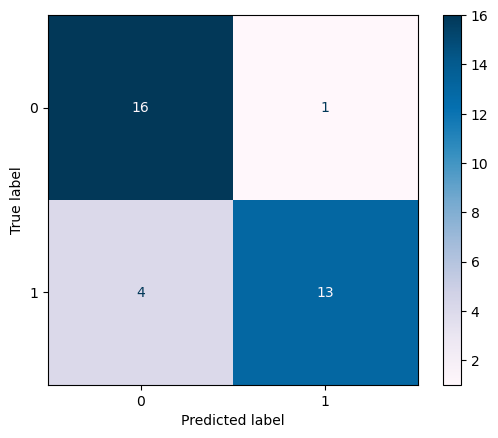

In [52]:
conf_mat = confusion_matrix(y_val, y_pred_rsfp, labels=classifier_rsfp.classes_) # TN, FP
print(conf_mat)  
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=classifier_rsfp.classes_)
disp.plot(cmap="PuBu")

In [55]:
from sklearn import metrics
precision_pca_rsf = metrics.precision_score(y_val, y_pred_rsfp)
accuracy_pca_rsf= metrics.accuracy_score(y_val, y_pred_rsfp)
sensitivity_pca_rsf = metrics.recall_score(y_val, y_pred_rsfp)
f_score_pca_rsf = metrics.f1_score(y_val, y_pred_rsfp)

print('precision: ', precision_pca_rsf)
print('accuracy: ', accuracy_pca_rsf)
print('sensitivity/recall: ', sensitivity_pca_rsf)
print('F score: ', f_score_pca_rsf)

precision:  0.9285714285714286
accuracy:  0.8529411764705882
sensitivity/recall:  0.7647058823529411
F score:  0.8387096774193549


In [57]:
from sklearn.neural_network import MLPClassifier
parameters_nnp = {'hidden_layer_sizes':[(10,20,10) ,(10,20,30), (30,20,10)], 
                  'solver':['sgd','adam'],
                 'activation':['tanh', 'relu'],
                  'max_iter':[800,900,1000]}
classifier_nnp = MLPClassifier()
clf = GridSearchCV(classifier_nnp, parameters_nnp, scoring='recall', cv=5, verbose=3)
clf.fit(X_train_r, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10, 20, 10), max_iter=800, solver=sgd;, score=0.862 total time=   1.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10, 20, 10), max_iter=800, solver=sgd;, score=0.931 total time=   0.7s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 20, 10), max_iter=800, solver=sgd;, score=0.966 total time=   1.0s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 20, 10), max_iter=800, solver=sgd;, score=0.966 total time=   1.1s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 20, 10), max_iter=800, solver=sgd;, score=0.897 total time=   1.2s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10, 20, 10), max_iter=800, solver=adam;, score=0.862 total time=   0.7s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10, 20, 10), max_iter=800, solver=adam;, score=0.931 total time=   1.6s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 20, 10), max_iter=800, solver=adam;, score=0.966 total time=   2.1s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 20, 10), max_iter=800, solver=adam;, score=0.862 total time=   1.4s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 20, 10), max_iter=800, solver=adam;, score=0.897 total time=   1.6s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10, 20, 10), max_iter=900, solver=sgd;, score=0.862 total time=   1.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10, 20, 10), max_iter=900, solver=sgd;, score=0.931 total time=   1.1s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 20, 10), max_iter=900, solver=sgd;, score=0.966 total time=   1.1s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 20, 10), max_iter=900, solver=sgd;, score=0.966 total time=   1.0s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 20, 10), max_iter=900, solver=sgd;, score=0.897 total time=   1.0s
[CV 1/5] END activation=tanh,

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, hidden_layer_sizes=(10, 20, 10), max_iter=900, solver=adam;, score=0.931 total time=   2.3s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 20, 10), max_iter=900, solver=adam;, score=0.966 total time=   2.1s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 20, 10), max_iter=900, solver=adam;, score=0.862 total time=   1.0s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 20, 10), max_iter=900, solver=adam;, score=0.862 total time=   2.2s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10, 20, 10), max_iter=1000, solver=sgd;, score=0.862 total time=   1.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10, 20, 10), max_iter=1000, solver=sgd;, score=0.931 total time=   1.1s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 20, 10), max_iter=1000, solver=sgd;, score=0.966 total time=   1.2s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 20, 10), max_iter=1000, solver=sgd;, score=0.931 total time=   0.8s
[CV 5/5] END activation=

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 20, 10), max_iter=1000, solver=adam;, score=0.966 total time=   2.6s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 20, 10), max_iter=1000, solver=adam;, score=0.862 total time=   1.7s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), max_iter=800, solver=sgd;, score=0.862 total time=   1.7s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), max_iter=800, solver=sgd;, score=0.931 total time=   1.2s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), max_iter=800, solver=sgd;, score=0.966 total time=   1.6s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), max_iter=800, solver=sgd;, score=0.966 total time=   1.2s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), max_iter=800, solver=sgd;, score=0.897 total time=   1.3s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), max_iter=800, solver=adam;, score=0.862 total time=   0.9s
[CV 2/5] END activation=tan

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), max_iter=800, solver=adam;, score=0.966 total time=   2.8s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), max_iter=800, solver=adam;, score=0.931 total time=   1.4s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), max_iter=800, solver=adam;, score=0.897 total time=   1.9s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), max_iter=900, solver=sgd;, score=0.862 total time=   1.5s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), max_iter=900, solver=sgd;, score=0.931 total time=   1.5s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), max_iter=900, solver=sgd;, score=0.966 total time=   1.6s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), max_iter=900, solver=sgd;, score=0.966 total time=   1.4s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), max_iter=900, solver=sgd;, score=0.897 total time=   1.4s
[CV 1/5] END activation=tanh,

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), max_iter=1000, solver=adam;, score=0.931 total time=   3.3s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), max_iter=1000, solver=adam;, score=0.897 total time=   2.0s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10, 20, 30), max_iter=1000, solver=adam;, score=0.828 total time=   2.0s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), max_iter=800, solver=sgd;, score=0.862 total time=   1.4s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), max_iter=800, solver=sgd;, score=0.931 total time=   1.2s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), max_iter=800, solver=sgd;, score=0.966 total time=   1.3s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), max_iter=800, solver=sgd;, score=0.966 total time=   1.2s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), max_iter=800, solver=sgd;, score=0.897 total time=   1.2s
[CV 1/5] END activation=ta

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), max_iter=800, solver=adam;, score=0.931 total time=   2.8s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), max_iter=800, solver=adam;, score=0.931 total time=   2.8s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), max_iter=800, solver=adam;, score=0.931 total time=   2.3s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), max_iter=800, solver=adam;, score=0.862 total time=   2.5s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), max_iter=900, solver=sgd;, score=0.862 total time=   1.7s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), max_iter=900, solver=sgd;, score=0.931 total time=   1.4s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), max_iter=900, solver=sgd;, score=0.966 total time=   1.2s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), max_iter=900, solver=sgd;, score=0.966 total time=   1.1s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), max_iter=900, solver=sgd;, score=0.897 total time=   1.3s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), max_iter=900, solver=adam;, score=0.862 total time=   0.7s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), max_iter=900, solver=adam;, score=0.931 total time=   2.0s
[CV 3/5] END activation=tanh,

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), max_iter=900, solver=adam;, score=1.000 total time=   2.7s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), max_iter=900, solver=adam;, score=0.862 total time=   3.2s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), max_iter=1000, solver=sgd;, score=0.862 total time=   1.4s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), max_iter=1000, solver=sgd;, score=0.931 total time=   1.5s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), max_iter=1000, solver=sgd;, score=0.966 total time=   1.2s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), max_iter=1000, solver=sgd;, score=0.931 total time=   1.3s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), max_iter=1000, solver=sgd;, score=0.897 total time=   1.2s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), max_iter=1000, solver=adam;, score=0.862 total time=   2.4s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), max_iter=1000, solver=adam;, score=0.931 total time=   2.4s
[CV 3/5] END activatio

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, hidden_layer_sizes=(30, 20, 10), max_iter=1000, solver=adam;, score=0.897 total time=   3.5s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 20, 10), max_iter=800, solver=sgd;, score=0.862 total time=   1.9s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 20, 10), max_iter=800, solver=sgd;, score=0.897 total time=   1.9s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 20, 10), max_iter=800, solver=sgd;, score=0.966 total time=   1.4s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 20, 10), max_iter=800, solver=sgd;, score=0.966 total time=   1.6s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 20, 10), max_iter=800, solver=sgd;, score=0.862 total time=   1.6s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 20, 10), max_iter=800, solver=adam;, score=0.862 total time=   1.2s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 20, 10), max_iter=800, solver=adam;, score=0.862 total time=   2.2s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 20, 10), max_iter=800, solver=adam;, score=0.966 total time=   2.2s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 20, 10), max_iter=800, solver=adam;, score=1.000 total time=   2.0s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 20, 10), max_iter=800, solver=adam;, score=0.828 total time=   2.3s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 20, 10), max_iter=900, solver=sgd;, score=0.862 total time=   1.6s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 20, 10), max_iter=900, solver=sgd;, score=0.931 total time=   1.6s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 20, 10), max_iter=900, solver=sgd;, score=0.966 total time=   1.7s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 20, 10), max_iter=900, solver=sgd;, score=0.931 total time=   2.1s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 20, 10), max_iter=900, solver=sgd;, score=0.862 total time=   2.1s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 20, 10), max_iter=900, solver=adam;, score=0.862 total time=   2.6s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 20, 10), max_iter=900, solver=adam;, score=0.931 total time=   2.6s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 20, 10), max_iter=900, solver=adam;, score=0.966 total time=   2.5s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 20, 10), max_iter=900, solver=adam;, score=1.000 total time=   2.1s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 20, 10), max_iter=900, solver=adam;, score=0.828 total time=   2.6s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 20, 10), max_iter=1000, solver=sgd;, score=0.862 total time=   1.4s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 20, 10), max_iter=1000, solver=sgd;, score=0.897 total time=   1.5s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 20, 10), max_iter=1000, solver=sgd;, score=0.966 total time=   2.1s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 20, 10), max_iter=1000, solver=sgd;, score=0.966 total time=   1.7s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 20, 10), max_iter=1000, solver=sgd;, score=0.897 total time=   1.6s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 20, 10), max_iter=1000, solver=adam;, score=0.862 total time=   1.3s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 20, 10), max_iter=1000, solver=adam;, score=0.931 total time=   1.5s
[CV 3/5] END activatio

C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), max_iter=800, solver=adam;, score=0.897 total time=   2.9s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), max_iter=800, solver=adam;, score=0.862 total time=   2.3s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), max_iter=900, solver=sgd;, score=0.862 total time=   2.9s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), max_iter=900, solver=sgd;, score=0.931 total time=   2.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), max_iter=900, solver=sgd;, score=0.966 total time=   2.4s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), max_iter=900, solver=sgd;, score=0.966 total time=   1.9s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), max_iter=900, solver=sgd;, score=0.862 total time=   2.0s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), max_iter=900, solver=adam;, score=0.862 total time=   2.7s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), max_iter=900, solver=adam;, score=0.897 total time=   2.5s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), max_iter=900, solver=adam;, score=0.897 total time=   3.2s


C:\Users\TehnoCentar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (900) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), max_iter=900, solver=adam;, score=0.966 total time=   3.4s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), max_iter=900, solver=adam;, score=0.862 total time=   1.5s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), max_iter=1000, solver=sgd;, score=0.862 total time=   2.5s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), max_iter=1000, solver=sgd;, score=0.931 total time=   1.9s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), max_iter=1000, solver=sgd;, score=0.966 total time=   1.6s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), max_iter=1000, solver=sgd;, score=0.966 total time=   2.6s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), max_iter=1000, solver=sgd;, score=0.828 total time=   2.4s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10, 20, 30), max_iter=1000, solver=adam;, score=0.862 total time=   2.0s
[CV 2/5] END activation

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [(10, 20, 10), (10, 20, 30),
                                                (30, 20, 10)],
                         'max_iter': [800, 900, 1000],
                         'solver': ['sgd', 'adam']},
             scoring='recall', verbose=3)

In [60]:
print("Najveca senzitivnost ", clf.best_score_)
print("Najbolji hiperparametri: ", clf.best_params_)

Najveca senzitivnost  0.9241379310344829
Najbolji hiperparametri:  {'activation': 'tanh', 'hidden_layer_sizes': (10, 20, 10), 'max_iter': 800, 'solver': 'sgd'}


In [102]:
classifier_nnp = MLPClassifier(hidden_layer_sizes =(10,20,10),max_iter = 800, activation = 'tanh', solver='sgd')
classifier_nnp.fit(X_train_r,y_train)
y_pred_nnp = classifier_nnp.predict(X_test_r)

[[17  0]
 [ 4 13]]


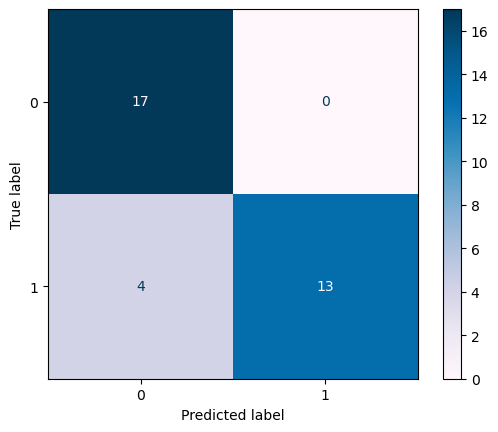

In [103]:
conf_mat = confusion_matrix(y_val, y_pred_nnp, labels=classifier_nnp.classes_) # TN, FP
print(conf_mat)  
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=classifier_nnp.classes_)
disp.plot(cmap="PuBu")

In [104]:
precision_nnp = metrics.precision_score(y_val, y_pred_nnp)
accuracy_nnp = metrics.accuracy_score(y_val, y_pred_nnp)
sensitivity_nnp = metrics.recall_score(y_val, y_pred_nnp)
f_score_nnp = metrics.f1_score(y_val, y_pred_nnp)

print('precision: ', precision_nnp)
print('accuracy: ', accuracy_nnp)
print('sensitivity/recall: ', sensitivity_nnp)
print('F score: ', f_score_nnp)

precision:  1.0
accuracy:  0.8823529411764706
sensitivity/recall:  0.7647058823529411
F score:  0.8666666666666666


OBUKA KONAČNOG MODELA KNN U PCA

In [104]:
s = StandardScaler()
s.fit(X_train1)
X_train1_std = s.transform(X_train1)
X_test_std = s.transform(X_test)
X_train1_std = pd.DataFrame(X_train1_std)
X_test_std = pd.DataFrame(X_test_std)
X_train1_std.columns = list(X.columns)
X_test_std.columns = list(X.columns)

In [124]:
pca1 = PCA(n_components=0.9)
pca1.fit(X_train1)
X_train1_r = pca.transform(X_train1_std)
X_test1_r = pca.transform(X_test_std)

In [127]:
knn_pca1 = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn_pca1.fit(X_train1_r,y_train1)
y_pred_pca_knn = knn_pca1.predict(X_test1_r)

[[15  4]
 [ 1 18]]


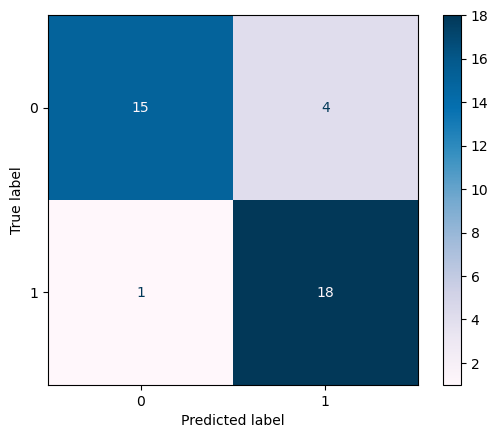

In [128]:
conf_mat = confusion_matrix(y_test, y_pred_pca_knn, labels=knn_pca1.classes_) # TN, FP
print(conf_mat)  
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=knn_pca1.classes_)
disp.plot(cmap="PuBu")

In [129]:
precision_konacno_knn = metrics.precision_score(y_test, y_pred_pca_knn)
accuracy_konacno_knn = metrics.accuracy_score(y_test, y_pred_pca_knn)
sensitivity_konacno_knn = metrics.recall_score(y_test, y_pred_pca_knn)
f_score_konacno_knn = metrics.f1_score(y_test, y_pred_pca_knn)

print('precision: ', precision_konacno_knn)
print('accuracy: ', accuracy_konacno_knn)
print('sensitivity/recall: ', sensitivity_konacno_knn)
print('F score: ', f_score_konacno_knn)

precision:  0.8181818181818182
accuracy:  0.868421052631579
sensitivity/recall:  0.9473684210526315
F score:  0.8780487804878049
